In [34]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
data = pd.read_csv("ag_map_with_alpha.txt", sep="\t",index_col=False, low_memory=False)

## Analysis of BMI on alpha diversity 

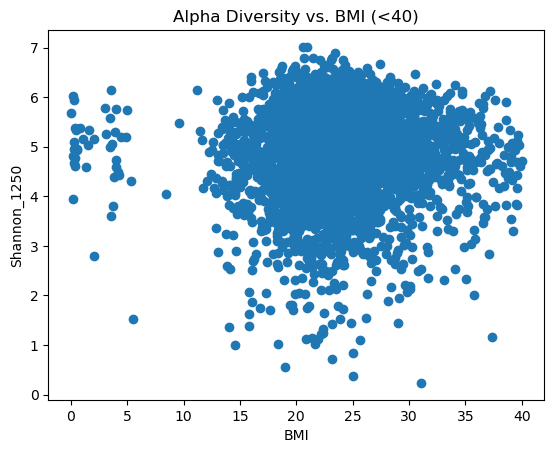

In [36]:
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')
t_data = data[(data['bmi'] < 40) & (data['shannon_1250'])]

plt.scatter(t_data['bmi'], t_data['shannon_1250'])
plt.xlabel('BMI')
plt.ylabel('Shannon_1250')
plt.title('Alpha Diversity vs. BMI (<40)')
plt.show()

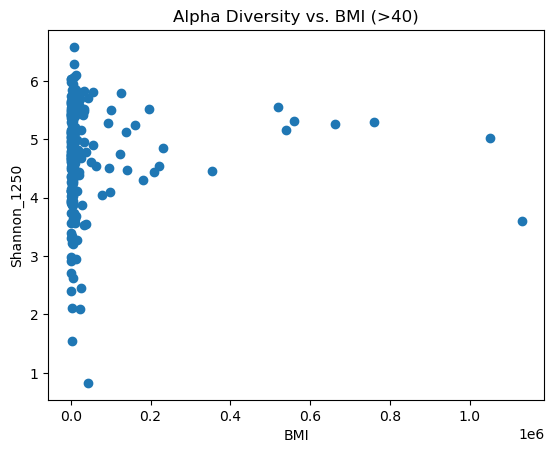

In [37]:
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')
t_data = data[(data['bmi'] > 40) & (data['shannon_1250'])]

plt.scatter(t_data['bmi'], t_data['shannon_1250'])
plt.xlabel('BMI')
plt.ylabel('Shannon_1250')
plt.title('Alpha Diversity vs. BMI (>40)')
plt.show()

## Effect of Age on Alpha Diversity

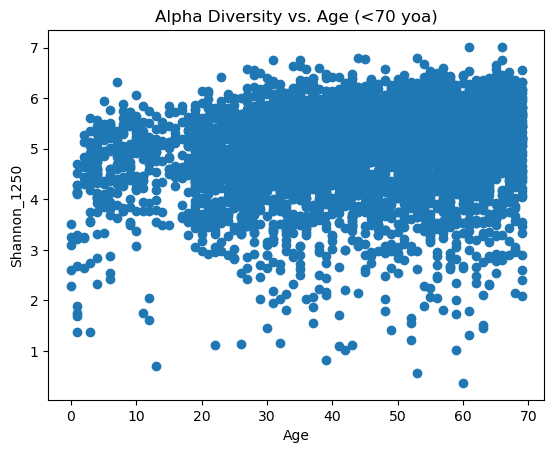

In [38]:
data['age_corrected'] = pd.to_numeric(data['age_corrected'], errors='coerce')
t_data_1 = data[(data['age_corrected'] < 70) & (data['shannon_1250'])]

plt.scatter(t_data_1['age_corrected'], t_data_1['shannon_1250'])
plt.xlabel('Age')
plt.ylabel('Shannon_1250')
plt.title('Alpha Diversity vs. Age (<70 yoa)')
plt.show()
# yoa = years of age

## Rarefaction Curve of Average Shannon Diversity

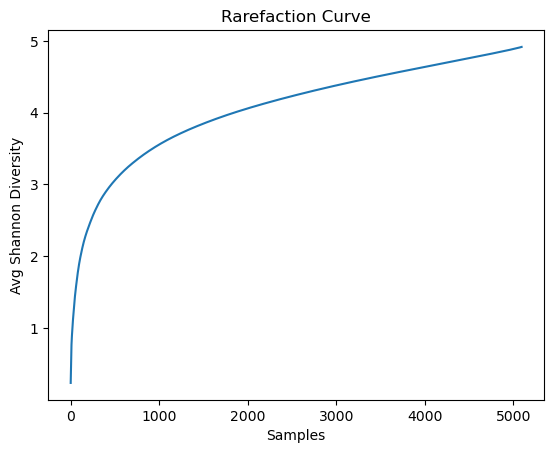

In [39]:
alpha_diversity = data['shannon_1250']
alpha_diversity_adjusted = np.sort(alpha_diversity)

num_samples = len(alpha_diversity_adjusted)

rarefaction_curve = []
for i in range(num_samples):
    rarefaction_curve.append(np.mean(alpha_diversity_adjusted[:i+1]))
plt.plot(range(1, num_samples + 1), rarefaction_curve)
plt.xlabel('Samples')
plt.ylabel('Avg Shannon Diversity')
plt.title('Rarefaction Curve')
plt.show()

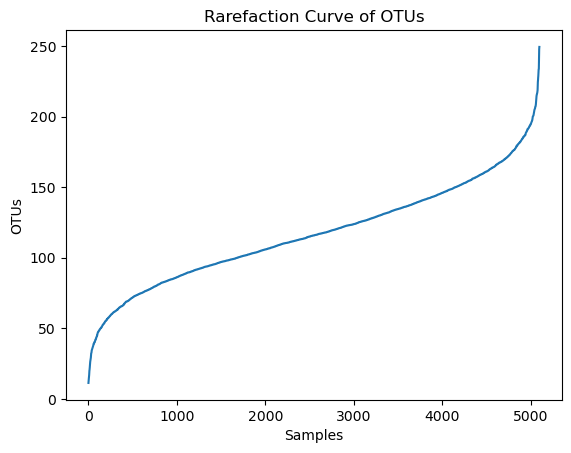

In [40]:
otus = data['observed_otus_1250']
otus_ordered = np.sort(otus)

plt.plot(range(1, num_samples + 1), otus_ordered)
plt.xlabel('Samples')
plt.ylabel('OTUs')
plt.title('Rarefaction Curve of OTUs')
plt.show()

# Machine Learning Analysis

## LinearRegression

### Mean Squared Error & R2

In [41]:
X = data[['age_corrected', 'bmi']]
y = data['shannon_1250']
imput = SimpleImputer(strategy='mean')
X_modified = imput.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, test_size=0.2, random_state=42)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)
predicted = est.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2_value = r2_score(y_test, predicted)

print("Mean Squared Error =", mse)
print("R2 =", r2_value)

Mean Squared Error = 0.7808688115148481
R2 = 0.029409961039201016


# Correlation Analysis

### by age

In [42]:
data = data.dropna()
# Removes NaN data from being processed
pearson_corr, p_value = stats.pearsonr(data['age_corrected'], data['observed_otus_1250'])
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson correlation coefficient: 0.24228949751614626
p-value: 4.2678643824537654e-30


In [43]:
corr_matrix = data[['age_corrected', 'observed_otus_1250']].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                    age_corrected  observed_otus_1250
age_corrected            1.000000            0.242289
observed_otus_1250       0.242289            1.000000


### by BMI

In [44]:
data = data.dropna()
pearson_corr, p_value = stats.pearsonr(data['bmi'], data['observed_otus_1250'])
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", p_value)

Pearson correlation coefficient: -0.015011976140882793
p-value: 0.4866097762718366


In [45]:
corr_matrix = data[['bmi', 'observed_otus_1250']].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                         bmi  observed_otus_1250
bmi                 1.000000           -0.015012
observed_otus_1250 -0.015012            1.000000
